<a href="https://colab.research.google.com/github/simgesonmez/MelbourneHousePriceModelTraining/blob/main/MelbourneHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [ ]:
df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
shape = df_copy.shape
print(f"Veri Setinin Şekli: {shape}")

Veri Setinin Şekli: (34857, 21)


In [ ]:
description = df_copy.describe(include='all')
print(description)

           Suburb       Address    Rooms   Type       Price Method SellerG        Date  Distance  Postcode  Bedroom2  Bathroom      Car  Landsize  BuildingArea  YearBuilt              CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
count       34857         34857 34857.00  34857    27247.00  34857   34857       34857  34856.00  34856.00  26640.00  26631.00 26129.00  23047.00      13742.00   15551.00                    34854   26881.00    26881.00                  34854       34854.00
unique        351         34009      NaN      3         NaN      9     388          78       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN                       33        NaN         NaN                      8            NaN
top     Reservoir  5 Charles St      NaN      h         NaN      S  Jellis  28/10/2017       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN  Boroondara City Council        NaN         NaN  Southern 

In [ ]:
# Kategorik sütunları belirleme
cat_cols = ['Type', 'Method']  # Örnek olarak "Type" ve "Method" ekledim
kategorik_df = df_copy[cat_cols]

# Sayısal sütunları belirleme
num_cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
sayisal_df = df_copy[num_cols]

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [ ]:
df_copy = df_copy.drop_duplicates()

In [ ]:
df_copy.duplicated().sum()

0

In [ ]:
z_scores_landsize = np.abs(zscore(df['Landsize']))
z_scores_buildingarea = np.abs(zscore(df['BuildingArea']))

In [ ]:
threshold = 3
outliers_landsize = (z_scores_landsize > threshold)
outliers_buildingarea = (z_scores_buildingarea > threshold)

In [ ]:
df_cleaned = df[~(outliers_landsize | outliers_buildingarea)]

In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
 #eksik değer sayısı
missing_values = df[['Bathroom', 'Car']].isnull().sum()
print(missing_values)


Bathroom    8226
Car         8728
dtype: int64


In [ ]:
# Eksik değerleri doldurma
imputer = SimpleImputer(strategy='mean')  # Veya 'median', 'most_frequent' gibi başka stratejileri de seçebilirsin
X_train_encoded_filled = imputer.fit_transform(X_train_encoded)
X_test_encoded_filled = imputer.transform(X_test_encoded)

NameError: ignored

In [ ]:
bathroom_mode = df['Bathroom'].mode()[0]
car_mode = df['Car'].mode()[0]

df['Bathroom'].fillna(bathroom_mode, inplace=True)
df['Car'].fillna(car_mode, inplace=True)

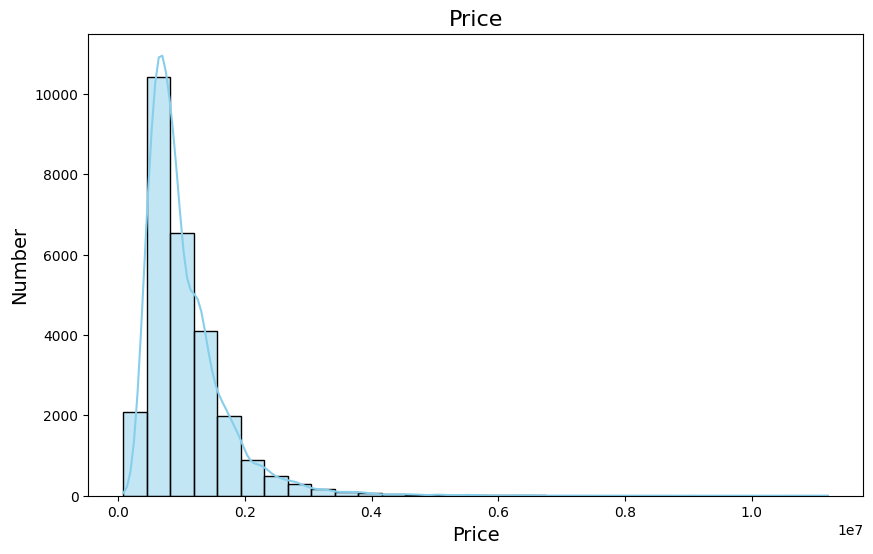

In [ ]:
# Fiyat dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy, x='Price', bins=30, kde=True, color='skyblue')
plt.title('Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.show()

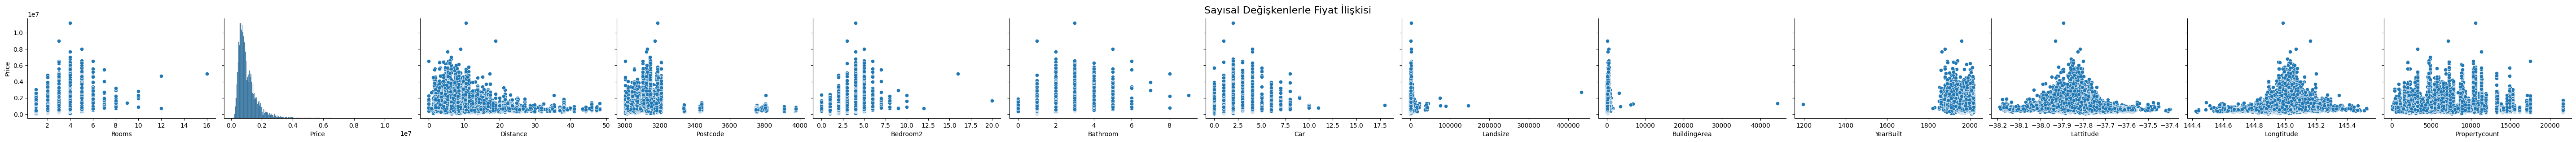

In [ ]:
# Tüm sayısal değişkenlerle fiyat değişkeni arasındaki ilişkiyi görselleştirme
numeric_columns = df_copy.select_dtypes(include='number').columns
sns.pairplot(df_copy, x_vars=numeric_columns, y_vars=['Price'], height=3, aspect=1.5)
plt.suptitle('Sayısal Değişkenlerle Fiyat İlişkisi', y=1.02, fontsize=16)
plt.show()

<ipython-input-26-a802f3577495>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


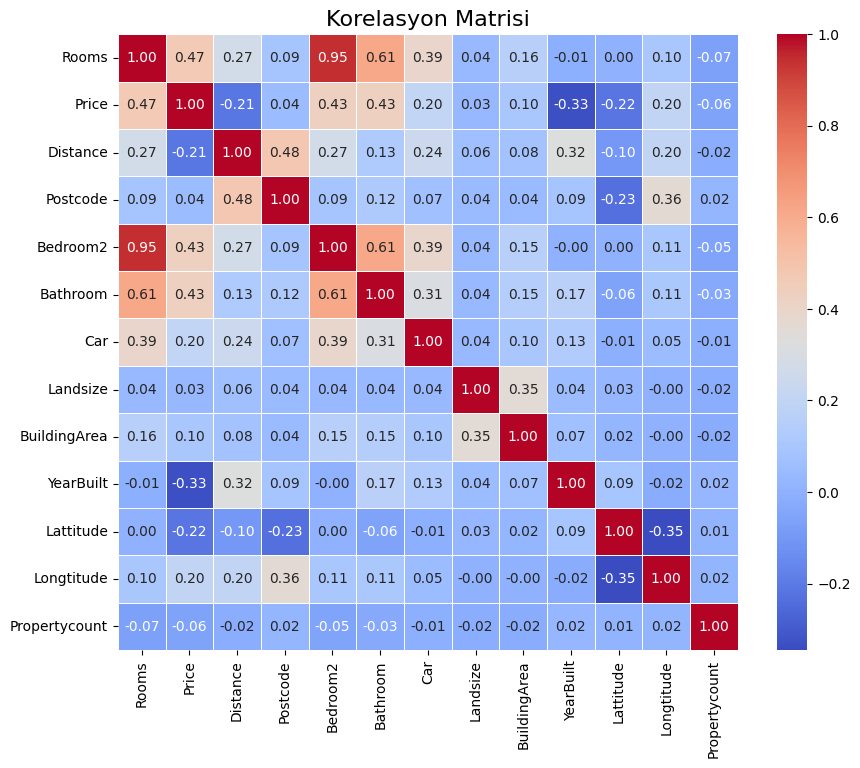

In [ ]:
# Korelasyon matrisini çizme
correlation_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()

In [ ]:
X = df_copy.drop('Price', axis=1)  # 'Price' sütununu bağımlı değişken olarak kullanmayacağız
y = df_copy['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Kategorik sütunları one-hot encode etme
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)



In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}


In [ ]:
# Değerlendirme metriklerini saklamak için
evaluation_metrics = {
    'MAE': {},
    'MSE': {},
    'RMSE': {},
    'R2': {}
}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train_encoded_filled, y_train)

NameError: ignored